In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.metrics import mean_squared_error

print(os.cpu_count())

20


In [2]:
base_path = './'
train_historic_merge = pd.read_csv(base_path + 'train_historic')

In [3]:
train_historic_merge

,county,is_business,datetime,data_block_id,prediction_unit_id,day_of_week,month,year,hour_of_day,product_type_0,product_type_1,product_type_2,product_type_3,consumption,production,temperature,snowfall,cloudcover_mid,direct_solar_radiation
0,0.0,0,2021-09-01 00:00:00,0,0,2,9,2021,0,0,1,0,0,-0.301387,-0.195957,0.65897,0.0,0.0,0.0
1,0.0,0,2021-09-01 00:00:00,0,1,2,9,2021,0,0,0,1,0,-0.302171,-0.283132,0.65897,0.0,0.0,0.0
2,0.0,0,2021-09-01 00:00:00,0,2,2,9,2021,0,0,0,0,1,-0.298978,0.420135,0.65897,0.0,0.0,0.0
3,0.0,1,2021-09-01 00:00:00,0,3,2,9,2021,0,1,0,0,0,-0.302171,-0.237292,0.65897,0.0,0.0,0.0
4,0.0,1,2021-09-01 00:00:00,0,4,2,9,2021,0,0,1,0,0,-0.302171,0.249582,0.65897,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009171,15.0,0,2023-05-31 23:00:00,637,57,2,5,2023,23,0,1,0,0,-0.302167,-0.255545,NaN,NaN,NaN,NaN
1009172,15.0,0,2023-05-31 23:00:00,637,58,2,5,2023,23,0,0,0,1,-0.299656,-0.173148,NaN,NaN,NaN,NaN
1009173,15.0,1,2023-05-31 23:00:00,637,64,2,5,2023,23,1,0,0,0,-0.302171,-0.085286,NaN,NaN,NaN,NaN
1009174,15.0,1,2023-05-31 23:00:00,637,59,2,5,2023,23,0,1,0,0,-0.302171,-0.270937,NaN,NaN,NaN,NaN


In [4]:
a = train_historic_merge.isna().sum() / train_historic_merge.shape[0] #identifico las conlumnas con Nans 
a.sort_values(ascending = False) #Organizo por las columnas que vas tienen NANS para no tenerlas en cuenta

direct_solar_radiation    0.002383
cloudcover_mid            0.002383
snowfall                  0.002383
temperature               0.002383
product_type_1            0.000000
production                0.000000
consumption               0.000000
product_type_3            0.000000
product_type_2            0.000000
county                    0.000000
is_business               0.000000
hour_of_day               0.000000
year                      0.000000
month                     0.000000
day_of_week               0.000000
prediction_unit_id        0.000000
data_block_id             0.000000
datetime                  0.000000
product_type_0            0.000000
dtype: float64

In [5]:
train_historic_merge.dropna(inplace = True) #Elimina las filas con valores vacios
train_historic_merge.shape

(1006771, 19)

In [6]:
columns_to_drop = ['production', 'data_block_id', 'prediction_unit_id', 'datetime']
train_historic_merge = train_historic_merge.drop(columns=columns_to_drop, axis=1)

In [7]:
import numpy as np
import keras
from keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

2023-12-13 19:51:39.819466: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 19:51:39.969006: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 19:51:40.564144: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 19:51:40.564206: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 19:51:40.568781: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [9]:
Y = train_historic_merge['consumption']

In [10]:
X = train_historic_merge

In [11]:
X.drop(columns = 'consumption', axis = 1)

,county,is_business,day_of_week,month,year,hour_of_day,product_type_0,product_type_1,product_type_2,product_type_3,temperature,snowfall,cloudcover_mid,direct_solar_radiation
0,0.0,0,2,9,2021,0,0,1,0,0,0.658970,0.0,0.00,0.000000
1,0.0,0,2,9,2021,0,0,0,1,0,0.658970,0.0,0.00,0.000000
2,0.0,0,2,9,2021,0,0,0,0,1,0.658970,0.0,0.00,0.000000
3,0.0,1,2,9,2021,0,1,0,0,0,0.658970,0.0,0.00,0.000000
4,0.0,1,2,9,2021,0,0,1,0,0,0.658970,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006766,15.0,0,1,5,2023,10,0,1,0,0,0.657194,0.0,0.35,0.345061
1006767,15.0,0,1,5,2023,10,0,0,0,1,0.657194,0.0,0.35,0.345061
1006768,15.0,1,1,5,2023,10,1,0,0,0,0.657194,0.0,0.35,0.345061
1006769,15.0,1,1,5,2023,10,0,1,0,0,0.657194,0.0,0.35,0.345061


In [15]:
#Divido la data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 123)

In [33]:
SO_model = Sequential()

# The Input Layer :
SO_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
SO_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
SO_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
SO_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
SO_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
SO_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
SO_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               2048      
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 166913 (652.00 KB)
Trainable params: 166913 (652.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
from keras.callbacks import ModelCheckpoint

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.keras' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [37]:
hist = SO_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/100
17617/17619 [============================>.] - ETA: 0s - loss: 0.0304 - mean_absolute_error: 0.0304
Epoch 1: val_loss improved from inf to 0.01486, saving model to Weights-001--0.01486.hdf5
17619/17619 [==============================] - 54s 3ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - val_loss: 0.0149 - val_mean_absolute_error: 0.0149
Epoch 2/100
   93/17619 [..............................] - ETA: 29s - loss: 0.0175 - mean_absolute_error: 0.0175

/home/alumno/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17607/17619 [============================>.] - ETA: 0s - loss: 0.0198 - mean_absolute_error: 0.0198
Epoch 2: val_loss improved from 0.01486 to 0.00615, saving model to Weights-002--0.00615.hdf5
17619/17619 [==============================] - 54s 3ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061
Epoch 3/100
17606/17619 [============================>.] - ETA: 0s - loss: 0.0171 - mean_absolute_error: 0.0171
Epoch 3: val_loss did not improve from 0.00615
17619/17619 [==============================] - 53s 3ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - val_loss: 0.0255 - val_mean_absolute_error: 0.0255
Epoch 4/100
17596/17619 [============================>.] - ETA: 0s - loss: 0.0140 - mean_absolute_error: 0.0140
Epoch 4: val_loss improved from 0.00615 to 0.00464, saving model to Weights-004--0.00464.hdf5
17619/17619 [==============================] - 50s 3ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - val_loss: 0.0046 -

17612/17619 [============================>.] - ETA: 0s - loss: 0.0060 - mean_absolute_error: 0.0060
Epoch 27: val_loss improved from 0.00246 to 0.00206, saving model to Weights-027--0.00206.hdf5
17619/17619 [==============================] - 52s 3ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - val_loss: 0.0021 - val_mean_absolute_error: 0.0021
Epoch 28/100
17614/17619 [============================>.] - ETA: 0s - loss: 0.0057 - mean_absolute_error: 0.0057
Epoch 28: val_loss did not improve from 0.00206
17619/17619 [==============================] - 56s 3ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - val_loss: 0.0054 - val_mean_absolute_error: 0.0054
Epoch 29/100
17588/17619 [============================>.] - ETA: 0s - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 29: val_loss did not improve from 0.00206
17619/17619 [==============================] - 49s 3ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071
Epoch 30/

Epoch 78/100
17614/17619 [============================>.] - ETA: 0s - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 78: val_loss did not improve from 0.00097
17619/17619 [==============================] - 55s 3ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - val_loss: 0.0041 - val_mean_absolute_error: 0.0041
Epoch 79/100
17605/17619 [============================>.] - ETA: 0s - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 79: val_loss did not improve from 0.00097
17619/17619 [==============================] - 55s 3ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0011 - val_mean_absolute_error: 0.0011
Epoch 80/100
17599/17619 [============================>.] - ETA: 0s - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 80: val_loss did not improve from 0.00097
17619/17619 [==============================] - 56s 3ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - val_loss: 0.0011 - val_mean_absolute_error: 0.0011
Epoch 81/100
17577/17619 [=================

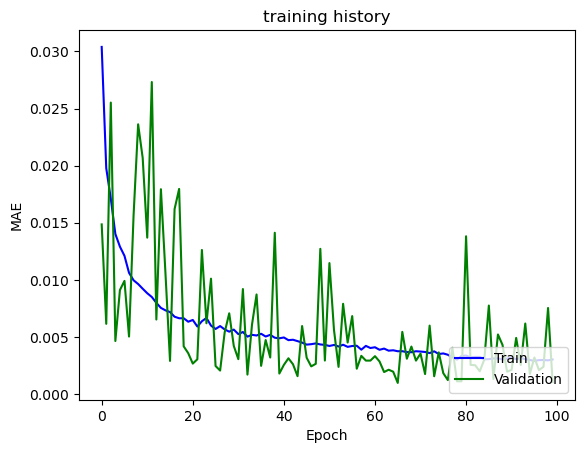

In [65]:
plt.plot(hist.history['mean_absolute_error'], c='b')
plt.plot(hist.history['val_loss'], c='g')
plt.title('training history')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train','Validation'],loc="lower right")
plt.show()

In [50]:
y_predict = SO_model.predict(X_test)

9439/9439 [==============================] - 5s 507us/step


In [2]:
#save model para guardarlo en un fichero

In [16]:
from tensorflow.keras.models import load_model
loaded_model = load_model('Weights-066--0.00097.hdf5')

In [17]:
y_predict = loaded_model.predict(X_test)

9439/9439 [==============================] - 5s 506us/step


In [19]:
# Convierte la lista en un array de NumPy
y_predict_array = np.array(y_predict)

# Ahora puedes ver la forma del array
print(y_predict_array.shape)

(302032, 1)


In [21]:
print(Y_test.shape)

(302032,)


In [24]:
#RMSE

mse= mean_squared_error(Y_test, y_predict_array[:, 0])
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 1.2761903300408494e-05
RMSE: 0.003572380620875734


In [26]:
train_results = pd.DataFrame(data={ 'Train Predictions':y_predict_array[:, 0], 'Actuals':Y_test})

In [35]:
train_results

,Train Predictions,Actuals
119283,-0.301756,-0.302171
674296,-0.301756,-0.302171
621149,-0.285347,-0.284910
514488,0.482048,0.481793
567392,-0.301756,-0.302118
...,...,...
100628,-0.301756,-0.298640
246941,-0.301756,-0.302131
626654,-0.301756,-0.299692
150056,-0.301756,-0.302171


/tmp/ipykernel_67529/1745618757.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(train_results['Train Predictions'], train_results['Actuals'], cmap =['blue', 'orange'], label=['Predicciones', 'Valores Reales'])


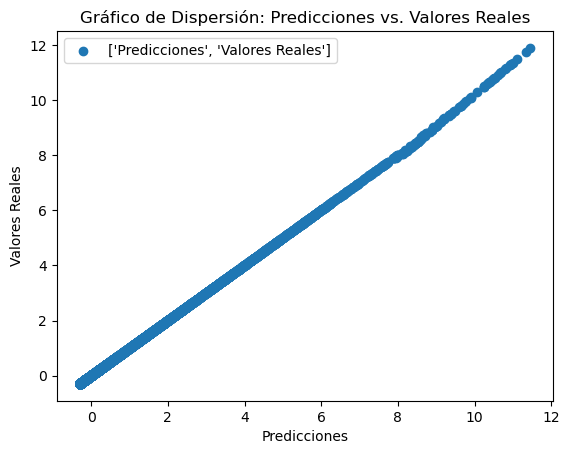

In [37]:
import matplotlib.pyplot as plt


plt.scatter(train_results['Train Predictions'], train_results['Actuals'], cmap =['blue', 'orange'], label=['Predicciones', 'Valores Reales'])
plt.title('Gráfico de Dispersión: Predicciones vs. Valores Reales')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.legend()
plt.show()

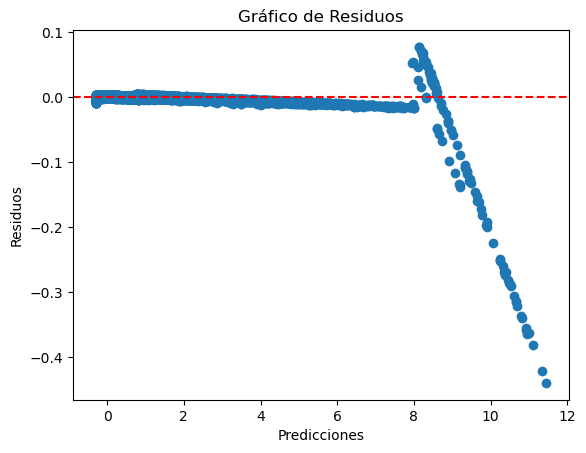

In [38]:
residuos = (train_results['Train Predictions'] - train_results['Actuals'])
plt.scatter(train_results['Train Predictions'], residuos)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='r', linestyle='--')  # Línea base en 0
plt.show()

# REGRESIÓN 2

In [8]:
base_path = './predict-energy-behavior-of-prosumers/'
train = pd.read_csv(base_path + 'train.csv')
gas_prices = pd.read_csv(base_path + 'gas_prices.csv')
client = pd.read_csv(base_path + 'client.csv')
electricity_prices = pd.read_csv(base_path + 'electricity_prices.csv')
forecast_weather = pd.read_csv(base_path + 'forecast_weather.csv')
historical_weather = pd.read_csv(base_path + 'historical_weather.csv')
county_mapping = pd.read_csv(base_path + 'weather_station_to_county_mapping.csv')

In [9]:
electricity_prices

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1
...,...,...,...,...
15281,2023-05-30 19:00:00,82.10,2023-05-29 19:00:00,637
15282,2023-05-30 20:00:00,150.85,2023-05-29 20:00:00,637
15283,2023-05-30 21:00:00,82.10,2023-05-29 21:00:00,637
15284,2023-05-30 22:00:00,82.09,2023-05-29 22:00:00,637


In [10]:
electricity_prices['forecast_date'] = pd.to_datetime(electricity_prices['forecast_date'], format='%Y-%m-%d %H:%M:%S')

In [11]:
base_path = './'
train_historic_merge = pd.read_csv(base_path + 'train_historic')

In [12]:
train_historic_merge.head(5)

,county,is_business,datetime,data_block_id,prediction_unit_id,day_of_week,month,year,hour_of_day,product_type_0,product_type_1,product_type_2,product_type_3,consumption,production,temperature,snowfall,cloudcover_mid,direct_solar_radiation
0,0.0,0,2021-09-01 00:00:00,0,0,2,9,2021,0,0,1,0,0,-0.301387,-0.195957,0.65897,0.0,0.0,0.0
1,0.0,0,2021-09-01 00:00:00,0,1,2,9,2021,0,0,0,1,0,-0.302171,-0.283132,0.65897,0.0,0.0,0.0
2,0.0,0,2021-09-01 00:00:00,0,2,2,9,2021,0,0,0,0,1,-0.298978,0.420135,0.65897,0.0,0.0,0.0
3,0.0,1,2021-09-01 00:00:00,0,3,2,9,2021,0,1,0,0,0,-0.302171,-0.237292,0.65897,0.0,0.0,0.0
4,0.0,1,2021-09-01 00:00:00,0,4,2,9,2021,0,0,1,0,0,-0.302171,0.249582,0.65897,0.0,0.0,0.0


In [13]:
electricity_prices['datetime'] = electricity_prices['forecast_date']

In [14]:
train_historic_merge['datetime'] = pd.to_datetime(train_historic_merge['datetime'])
electricity_prices['datetime'] = pd.to_datetime(electricity_prices['datetime'])

merged_df = pd.merge(train_historic_merge, electricity_prices, on='datetime', how='left')

# Mostrar el resultado
merged_df

,county,is_business,datetime,data_block_id_x,prediction_unit_id,day_of_week,month,year,hour_of_day,product_type_0,...,consumption,production,temperature,snowfall,cloudcover_mid,direct_solar_radiation,forecast_date,euros_per_mwh,origin_date,data_block_id_y
0,0.0,0,2021-09-01 00:00:00,0,0,2,9,2021,0,0,...,-0.301387,-0.195957,0.65897,0.0,0.0,0.0,2021-09-01,92.51,2021-08-31 00:00:00,1.0
1,0.0,0,2021-09-01 00:00:00,0,1,2,9,2021,0,0,...,-0.302171,-0.283132,0.65897,0.0,0.0,0.0,2021-09-01,92.51,2021-08-31 00:00:00,1.0
2,0.0,0,2021-09-01 00:00:00,0,2,2,9,2021,0,0,...,-0.298978,0.420135,0.65897,0.0,0.0,0.0,2021-09-01,92.51,2021-08-31 00:00:00,1.0
3,0.0,1,2021-09-01 00:00:00,0,3,2,9,2021,0,1,...,-0.302171,-0.237292,0.65897,0.0,0.0,0.0,2021-09-01,92.51,2021-08-31 00:00:00,1.0
4,0.0,1,2021-09-01 00:00:00,0,4,2,9,2021,0,0,...,-0.302171,0.249582,0.65897,0.0,0.0,0.0,2021-09-01,92.51,2021-08-31 00:00:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009171,15.0,0,2023-05-31 23:00:00,637,57,2,5,2023,23,0,...,-0.302167,-0.255545,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1009172,15.0,0,2023-05-31 23:00:00,637,58,2,5,2023,23,0,...,-0.299656,-0.173148,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1009173,15.0,1,2023-05-31 23:00:00,637,64,2,5,2023,23,1,...,-0.302171,-0.085286,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1009174,15.0,1,2023-05-31 23:00:00,637,59,2,5,2023,23,0,...,-0.302171,-0.270937,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [15]:
b = merged_df.isna().sum() / merged_df.shape[0] #identifico las conlumnas con Nans 
b.sort_values(ascending = False) #Organizo por las columnas que vas tienen NANS para no tenerlas en cuenta

direct_solar_radiation    0.002383
cloudcover_mid            0.002383
snowfall                  0.002383
temperature               0.002383
data_block_id_y           0.001678
origin_date               0.001678
euros_per_mwh             0.001678
forecast_date             0.001678
product_type_3            0.000000
production                0.000000
consumption               0.000000
county                    0.000000
is_business               0.000000
product_type_1            0.000000
product_type_0            0.000000
hour_of_day               0.000000
year                      0.000000
month                     0.000000
day_of_week               0.000000
prediction_unit_id        0.000000
data_block_id_x           0.000000
datetime                  0.000000
product_type_2            0.000000
dtype: float64

In [16]:
gas_prices

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5
...,...,...,...,...,...
632,2023-05-26,29.10,34.10,2023-05-25,633
633,2023-05-27,28.30,34.10,2023-05-26,634
634,2023-05-28,28.10,34.10,2023-05-27,635
635,2023-05-29,28.16,36.98,2023-05-28,636


In [17]:
merged_df['day']= merged_df['datetime'].dt.day

In [18]:
gas_prices['forecast_date']= pd.to_datetime(gas_prices['forecast_date'])

In [19]:
gas_prices['day'] = gas_prices['forecast_date'].dt.day

In [20]:
gas_prices['month'] = gas_prices['forecast_date'].dt.month

In [21]:
gas_prices['year'] = gas_prices['forecast_date'].dt.year

In [22]:
merged_df_gas = pd.merge(merged_df, gas_prices, on=['day','month','year'], how='left')

In [23]:
merged_df_gas

,county,is_business,datetime,data_block_id_x,prediction_unit_id,day_of_week,month,year,hour_of_day,product_type_0,...,forecast_date_x,euros_per_mwh,origin_date_x,data_block_id_y,day,forecast_date_y,lowest_price_per_mwh,highest_price_per_mwh,origin_date_y,data_block_id
0,0.0,0,2021-09-01 00:00:00,0,0,2,9,2021,0,0,...,2021-09-01,92.51,2021-08-31 00:00:00,1.0,1,2021-09-01,45.23,46.32,2021-08-31,1.0
1,0.0,0,2021-09-01 00:00:00,0,1,2,9,2021,0,0,...,2021-09-01,92.51,2021-08-31 00:00:00,1.0,1,2021-09-01,45.23,46.32,2021-08-31,1.0
2,0.0,0,2021-09-01 00:00:00,0,2,2,9,2021,0,0,...,2021-09-01,92.51,2021-08-31 00:00:00,1.0,1,2021-09-01,45.23,46.32,2021-08-31,1.0
3,0.0,1,2021-09-01 00:00:00,0,3,2,9,2021,0,1,...,2021-09-01,92.51,2021-08-31 00:00:00,1.0,1,2021-09-01,45.23,46.32,2021-08-31,1.0
4,0.0,1,2021-09-01 00:00:00,0,4,2,9,2021,0,0,...,2021-09-01,92.51,2021-08-31 00:00:00,1.0,1,2021-09-01,45.23,46.32,2021-08-31,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009171,15.0,0,2023-05-31 23:00:00,637,57,2,5,2023,23,0,...,NaT,NaN,NaN,NaN,31,NaT,NaN,NaN,NaN,NaN
1009172,15.0,0,2023-05-31 23:00:00,637,58,2,5,2023,23,0,...,NaT,NaN,NaN,NaN,31,NaT,NaN,NaN,NaN,NaN
1009173,15.0,1,2023-05-31 23:00:00,637,64,2,5,2023,23,1,...,NaT,NaN,NaN,NaN,31,NaT,NaN,NaN,NaN,NaN
1009174,15.0,1,2023-05-31 23:00:00,637,59,2,5,2023,23,0,...,NaT,NaN,NaN,NaN,31,NaT,NaN,NaN,NaN,NaN


In [24]:
c = merged_df_gas.isna().sum() / merged_df_gas.shape[0] #identifico las conlumnas con Nans 
c.sort_values(ascending = False) #Organizo por las columnas que vas tienen NANS para no tenerlas en cuenta

temperature               0.002383
direct_solar_radiation    0.002383
cloudcover_mid            0.002383
snowfall                  0.002383
data_block_id_y           0.001678
origin_date_x             0.001678
euros_per_mwh             0.001678
forecast_date_x           0.001678
data_block_id             0.001546
origin_date_y             0.001546
highest_price_per_mwh     0.001546
lowest_price_per_mwh      0.001546
forecast_date_y           0.001546
day                       0.000000
county                    0.000000
is_business               0.000000
consumption               0.000000
product_type_3            0.000000
product_type_2            0.000000
product_type_1            0.000000
product_type_0            0.000000
hour_of_day               0.000000
year                      0.000000
month                     0.000000
day_of_week               0.000000
prediction_unit_id        0.000000
data_block_id_x           0.000000
datetime                  0.000000
production          

In [25]:
merged_df_gas.dropna(inplace = True) #Elimina las filas con valores vacios
merged_df_gas.shape

(1006638, 29)

In [26]:
merged_df_gas.columns

Index(['county', 'is_business', 'datetime', 'data_block_id_x',
       'prediction_unit_id', 'day_of_week', 'month', 'year', 'hour_of_day',
       'product_type_0', 'product_type_1', 'product_type_2', 'product_type_3',
       'consumption', 'production', 'temperature', 'snowfall',
       'cloudcover_mid', 'direct_solar_radiation', 'forecast_date_x',
       'euros_per_mwh', 'origin_date_x', 'data_block_id_y', 'day',
       'forecast_date_y', 'lowest_price_per_mwh', 'highest_price_per_mwh',
       'origin_date_y', 'data_block_id'],
      dtype='object')

In [27]:
columns_to_drop = ['data_block_id', 'prediction_unit_id', 'datetime', 'forecast_date_x','origin_date_x','data_block_id_y','forecast_date_y','origin_date_y','data_block_id']
merged_df_gas = merged_df_gas.drop(columns=columns_to_drop, axis=1)

In [28]:
merged_df_gas.head(5)

,county,is_business,data_block_id_x,day_of_week,month,year,hour_of_day,product_type_0,product_type_1,product_type_2,...,consumption,production,temperature,snowfall,cloudcover_mid,direct_solar_radiation,euros_per_mwh,day,lowest_price_per_mwh,highest_price_per_mwh
0,0.0,0,0,2,9,2021,0,0,1,0,...,-0.301387,-0.195957,0.65897,0.0,0.0,0.0,92.51,1,45.23,46.32
1,0.0,0,0,2,9,2021,0,0,0,1,...,-0.302171,-0.283132,0.65897,0.0,0.0,0.0,92.51,1,45.23,46.32
2,0.0,0,0,2,9,2021,0,0,0,0,...,-0.298978,0.420135,0.65897,0.0,0.0,0.0,92.51,1,45.23,46.32
3,0.0,1,0,2,9,2021,0,1,0,0,...,-0.302171,-0.237292,0.65897,0.0,0.0,0.0,92.51,1,45.23,46.32
4,0.0,1,0,2,9,2021,0,0,1,0,...,-0.302171,0.249582,0.65897,0.0,0.0,0.0,92.51,1,45.23,46.32


In [29]:
columns_to_drop_2 = ['data_block_id_x']
merged_df_gas = merged_df_gas.drop(columns=columns_to_drop_2, axis=1)

In [30]:
merged_df_gas.head(5)

,county,is_business,day_of_week,month,year,hour_of_day,product_type_0,product_type_1,product_type_2,product_type_3,consumption,production,temperature,snowfall,cloudcover_mid,direct_solar_radiation,euros_per_mwh,day,lowest_price_per_mwh,highest_price_per_mwh
0,0.0,0,2,9,2021,0,0,1,0,0,-0.301387,-0.195957,0.65897,0.0,0.0,0.0,92.51,1,45.23,46.32
1,0.0,0,2,9,2021,0,0,0,1,0,-0.302171,-0.283132,0.65897,0.0,0.0,0.0,92.51,1,45.23,46.32
2,0.0,0,2,9,2021,0,0,0,0,1,-0.298978,0.420135,0.65897,0.0,0.0,0.0,92.51,1,45.23,46.32
3,0.0,1,2,9,2021,0,1,0,0,0,-0.302171,-0.237292,0.65897,0.0,0.0,0.0,92.51,1,45.23,46.32
4,0.0,1,2,9,2021,0,0,1,0,0,-0.302171,0.249582,0.65897,0.0,0.0,0.0,92.51,1,45.23,46.32


In [31]:
Y = merged_df_gas['production']

In [32]:
X = merged_df_gas

In [33]:
X.drop(columns = 'production', axis = 1)

,county,is_business,day_of_week,month,year,hour_of_day,product_type_0,product_type_1,product_type_2,product_type_3,consumption,temperature,snowfall,cloudcover_mid,direct_solar_radiation,euros_per_mwh,day,lowest_price_per_mwh,highest_price_per_mwh
0,0.0,0,2,9,2021,0,0,1,0,0,-0.301387,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
1,0.0,0,2,9,2021,0,0,0,1,0,-0.302171,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
2,0.0,0,2,9,2021,0,0,0,0,1,-0.298978,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
3,0.0,1,2,9,2021,0,1,0,0,0,-0.302171,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
4,0.0,1,2,9,2021,0,0,1,0,0,-0.302171,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006766,15.0,0,1,5,2023,10,0,1,0,0,-0.149293,0.657194,0.0,0.35,0.345061,82.37,30,29.00,34.00
1006767,15.0,0,1,5,2023,10,0,0,0,1,0.390786,0.657194,0.0,0.35,0.345061,82.37,30,29.00,34.00
1006768,15.0,1,1,5,2023,10,1,0,0,0,-0.207383,0.657194,0.0,0.35,0.345061,82.37,30,29.00,34.00
1006769,15.0,1,1,5,2023,10,0,1,0,0,-0.098990,0.657194,0.0,0.35,0.345061,82.37,30,29.00,34.00


In [44]:
#Divido la data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 123)

In [45]:
S1_model = Sequential()

# The Input Layer :
S1_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
S1_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
S1_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
S1_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
S1_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
S1_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
S1_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               2688      
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 35969 (140.50 KB)
Trainable params: 35969 (140.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_name = '2Weights-{epoch:03d}--{val_loss:.5f}.h5' 

checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]


In [47]:
model2 = S1_model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/200
17586/17617 [============================>.] - ETA: 0s - loss: 0.1583 - mean_absolute_error: 0.1583
Epoch 1: val_loss improved from inf to 0.02745, saving model to 2Weights-001--0.02745.h5
17617/17617 [==============================] - 14s 772us/step - loss: 0.1581 - mean_absolute_error: 0.1581 - val_loss: 0.0275 - val_mean_absolute_error: 0.0275
Epoch 2/200
  185/17617 [..............................] - ETA: 14s - loss: 0.0416 - mean_absolute_error: 0.0416

/home/alumno/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17573/17617 [============================>.] - ETA: 0s - loss: 0.0319 - mean_absolute_error: 0.0319
Epoch 2: val_loss improved from 0.02745 to 0.02138, saving model to 2Weights-002--0.02138.h5
17617/17617 [==============================] - 14s 778us/step - loss: 0.0319 - mean_absolute_error: 0.0319 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214
Epoch 3/200
17615/17617 [============================>.] - ETA: 0s - loss: 0.0253 - mean_absolute_error: 0.0253
Epoch 3: val_loss did not improve from 0.02138
17617/17617 [==============================] - 13s 729us/step - loss: 0.0253 - mean_absolute_error: 0.0253 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301
Epoch 4/200
17611/17617 [============================>.] - ETA: 0s - loss: 0.0217 - mean_absolute_error: 0.0217
Epoch 4: val_loss improved from 0.02138 to 0.01225, saving model to 2Weights-004--0.01225.h5
17617/17617 [==============================] - 13s 755us/step - loss: 0.0217 - mean_absolute_error: 0.0217 - val_loss: 0.01

Epoch 27/200
17540/17617 [============================>.] - ETA: 0s - loss: 0.0119 - mean_absolute_error: 0.0119
Epoch 27: val_loss did not improve from 0.00477
17617/17617 [==============================] - 14s 791us/step - loss: 0.0119 - mean_absolute_error: 0.0119 - val_loss: 0.0114 - val_mean_absolute_error: 0.0114
Epoch 28/200
17552/17617 [============================>.] - ETA: 0s - loss: 0.0115 - mean_absolute_error: 0.0115
Epoch 28: val_loss did not improve from 0.00477
17617/17617 [==============================] - 14s 776us/step - loss: 0.0115 - mean_absolute_error: 0.0115 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214
Epoch 29/200
17607/17617 [============================>.] - ETA: 0s - loss: 0.0117 - mean_absolute_error: 0.0117
Epoch 29: val_loss did not improve from 0.00477
17617/17617 [==============================] - 13s 751us/step - loss: 0.0117 - mean_absolute_error: 0.0117 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095
Epoch 30/200
17572/17617 [===========

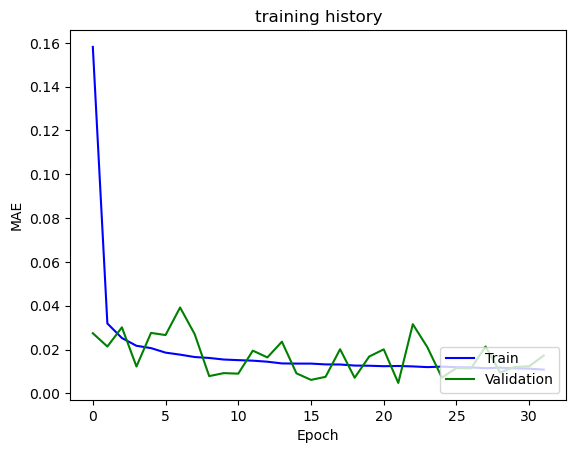

In [48]:
plt.plot(model2.history['mean_absolute_error'], c='b')
plt.plot(model2.history['val_loss'], c='g')
plt.title('training history')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train','Validation'],loc="lower right")
plt.show()

In [51]:
from tensorflow.keras.models import load_model
loaded_model2= load_model('2Weights-022--0.00477.h5')

In [52]:
y_predict_production = loaded_model2.predict(X_test)

9438/9438 [==============================] - 3s 356us/step


In [53]:
y_predict_array_production = np.array(y_predict_production)

# Ahora puedes ver la forma del array
print(y_predict_array_production.shape)

(301992, 1)


In [54]:
mse= mean_squared_error(Y_test, y_predict_array_production[:, 0])
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 3.3596329067335435e-05
RMSE: 0.005796234041801231


In [56]:
train_results = pd.DataFrame(data={ 'Train Predictions':y_predict_array_production[:, 0], 'Actuals':Y_test})
train_results

,Train Predictions,Actuals
86233,-0.271598,-0.276256
91573,0.230098,0.228017
594039,0.321941,0.323033
832146,-0.290484,-0.295696
35845,-0.289814,-0.293934
...,...,...
765452,-0.244287,-0.248813
230290,-0.221961,-0.228600
316005,-0.175144,-0.179193
312272,-0.218217,-0.225795


/tmp/ipykernel_7934/1745618757.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(train_results['Train Predictions'], train_results['Actuals'], cmap =['blue', 'orange'], label=['Predicciones', 'Valores Reales'])


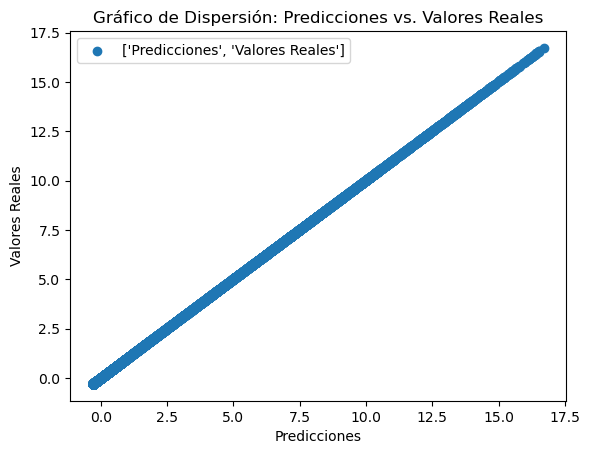

In [57]:
import matplotlib.pyplot as plt


plt.scatter(train_results['Train Predictions'], train_results['Actuals'], cmap =['blue', 'orange'], label=['Predicciones', 'Valores Reales'])
plt.title('Gráfico de Dispersión: Predicciones vs. Valores Reales')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.legend()
plt.show()

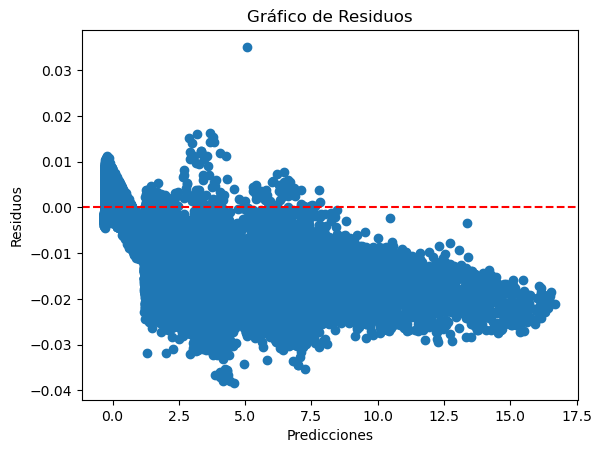

In [58]:
residuos = (train_results['Train Predictions'] - train_results['Actuals'])
plt.scatter(train_results['Train Predictions'], residuos)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='r', linestyle='--')  # Línea base en 0
plt.show()

# Regresion 2 : Consumo

In [59]:
Y2 = merged_df_gas['consumption']

In [61]:
X2 = merged_df_gas
X2

,county,is_business,day_of_week,month,year,hour_of_day,product_type_0,product_type_1,product_type_2,product_type_3,consumption,production,temperature,snowfall,cloudcover_mid,direct_solar_radiation,euros_per_mwh,day,lowest_price_per_mwh,highest_price_per_mwh
0,0.0,0,2,9,2021,0,0,1,0,0,-0.301387,-0.195957,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
1,0.0,0,2,9,2021,0,0,0,1,0,-0.302171,-0.283132,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
2,0.0,0,2,9,2021,0,0,0,0,1,-0.298978,0.420135,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
3,0.0,1,2,9,2021,0,1,0,0,0,-0.302171,-0.237292,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
4,0.0,1,2,9,2021,0,0,1,0,0,-0.302171,0.249582,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006766,15.0,0,1,5,2023,10,0,1,0,0,-0.149293,-0.281239,0.657194,0.0,0.35,0.345061,82.37,30,29.00,34.00
1006767,15.0,0,1,5,2023,10,0,0,0,1,0.390786,-0.277476,0.657194,0.0,0.35,0.345061,82.37,30,29.00,34.00
1006768,15.0,1,1,5,2023,10,1,0,0,0,-0.207383,0.458239,0.657194,0.0,0.35,0.345061,82.37,30,29.00,34.00
1006769,15.0,1,1,5,2023,10,0,1,0,0,-0.098990,-0.248523,0.657194,0.0,0.35,0.345061,82.37,30,29.00,34.00


In [76]:
X2.drop(columns = 'consumption', axis = 1)

,county,is_business,day_of_week,month,year,hour_of_day,product_type_0,product_type_1,product_type_2,product_type_3,production,temperature,snowfall,cloudcover_mid,direct_solar_radiation,euros_per_mwh,day,lowest_price_per_mwh,highest_price_per_mwh
0,0.0,0,2,9,2021,0,0,1,0,0,-0.195957,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
1,0.0,0,2,9,2021,0,0,0,1,0,-0.283132,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
2,0.0,0,2,9,2021,0,0,0,0,1,0.420135,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
3,0.0,1,2,9,2021,0,1,0,0,0,-0.237292,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
4,0.0,1,2,9,2021,0,0,1,0,0,0.249582,0.658970,0.0,0.00,0.000000,92.51,1,45.23,46.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006766,15.0,0,1,5,2023,10,0,1,0,0,-0.281239,0.657194,0.0,0.35,0.345061,82.37,30,29.00,34.00
1006767,15.0,0,1,5,2023,10,0,0,0,1,-0.277476,0.657194,0.0,0.35,0.345061,82.37,30,29.00,34.00
1006768,15.0,1,1,5,2023,10,1,0,0,0,0.458239,0.657194,0.0,0.35,0.345061,82.37,30,29.00,34.00
1006769,15.0,1,1,5,2023,10,0,1,0,0,-0.248523,0.657194,0.0,0.35,0.345061,82.37,30,29.00,34.00


In [77]:
#Divido la data
X_train, X_test, Y_train, Y_test = train_test_split(X2,Y2,test_size = 0.3, random_state = 123)

In [78]:
S2_model = Sequential()

# The Input Layer :
S2_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
S2_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
S2_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
S2_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
S2_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               2688      
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 1)                 257       
                                                                 
Total params: 35969 (140.50 KB)
Trainable params: 35969 (140.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_name = '3Weights-{epoch:03d}--{val_loss:.5f}.h5' 

checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]


In [80]:
model3 = S2_model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/200
17600/17617 [============================>.] - ETA: 0s - loss: 0.1362 - mean_absolute_error: 0.1362
Epoch 1: val_loss improved from inf to 0.02023, saving model to 3Weights-001--0.02023.h5
17617/17617 [==============================] - 14s 788us/step - loss: 0.1361 - mean_absolute_error: 0.1361 - val_loss: 0.0202 - val_mean_absolute_error: 0.0202
Epoch 2/200
  202/17617 [..............................] - ETA: 13s - loss: 0.0246 - mean_absolute_error: 0.0246

/home/alumno/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17551/17617 [============================>.] - ETA: 0s - loss: 0.0216 - mean_absolute_error: 0.0216
Epoch 2: val_loss did not improve from 0.02023
17617/17617 [==============================] - 15s 826us/step - loss: 0.0216 - mean_absolute_error: 0.0216 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231
Epoch 3/200
17593/17617 [============================>.] - ETA: 0s - loss: 0.0147 - mean_absolute_error: 0.0147
Epoch 3: val_loss did not improve from 0.02023
17617/17617 [==============================] - 14s 788us/step - loss: 0.0147 - mean_absolute_error: 0.0147 - val_loss: 0.0240 - val_mean_absolute_error: 0.0240
Epoch 4/200
17538/17617 [============================>.] - ETA: 0s - loss: 0.0120 - mean_absolute_error: 0.0120
Epoch 4: val_loss improved from 0.02023 to 0.01512, saving model to 3Weights-004--0.01512.h5
17617/17617 [==============================] - 14s 785us/step - loss: 0.0120 - mean_absolute_error: 0.0120 - val_loss: 0.0151 - val_mean_absolute_error: 0.0151
Epoch 5/2

17598/17617 [============================>.] - ETA: 0s - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 26: val_loss did not improve from 0.00282
17617/17617 [==============================] - 14s 779us/step - loss: 0.0052 - mean_absolute_error: 0.0052 - val_loss: 0.0211 - val_mean_absolute_error: 0.0211
Epoch 27/200
17562/17617 [============================>.] - ETA: 0s - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 27: val_loss did not improve from 0.00282
17617/17617 [==============================] - 13s 741us/step - loss: 0.0048 - mean_absolute_error: 0.0048 - val_loss: 0.0030 - val_mean_absolute_error: 0.0030
Epoch 28/200
17533/17617 [============================>.] - ETA: 0s - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 28: val_loss did not improve from 0.00282
17617/17617 [==============================] - 14s 809us/step - loss: 0.0049 - mean_absolute_error: 0.0049 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063
Epoch 29/200
17571/17617 [========================

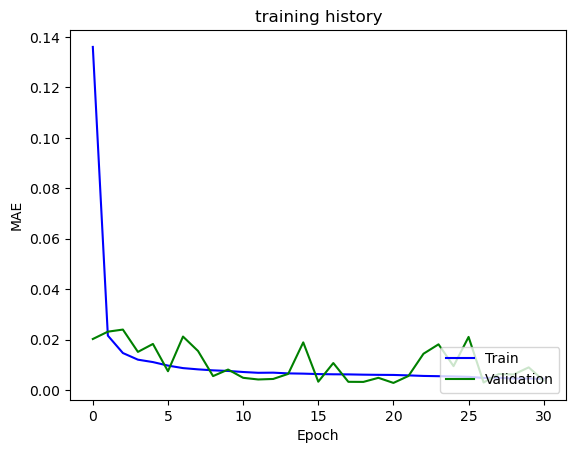

In [81]:
plt.plot(model3.history['mean_absolute_error'], c='b')
plt.plot(model3.history['val_loss'], c='g')
plt.title('training history')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train','Validation'],loc="lower right")
plt.show()

In [91]:
from tensorflow.keras.models import load_model
loaded_model3= load_model('3Weights-021--0.00282.h5')

In [92]:
y_predict_consumption = loaded_model3.predict(X_test)

9438/9438 [==============================] - 4s 375us/step


In [93]:
y_predict_consumption

array([[-0.30134916],
       [ 0.09269169],
       [-0.20263198],
       ...,
       [-0.30134916],
       [-0.30134916],
       [-0.30134916]], dtype=float32)

In [94]:
y_predict_array_consumption = np.array(y_predict_consumption)

# Ahora puedes ver la forma del array
print(y_predict_array_consumption.shape)

(301992, 1)


In [95]:
mse= mean_squared_error(Y_test, y_predict_array_consumption[:, 0])
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 4.1982902251135436e-05
RMSE: 0.006479421444167329


In [96]:
train_results = pd.DataFrame(data={ 'Train Predictions':y_predict_array_consumption[:, 0], 'Actuals':Y_test})
train_results

,Train Predictions,Actuals
86233,-0.301349,-0.302171
91573,0.092692,0.100652
594039,-0.202632,-0.197097
832146,-0.268219,-0.262069
35845,-0.243914,-0.241576
...,...,...
765452,-0.301349,-0.302171
230290,-0.301349,-0.302171
316005,-0.301349,-0.302105
312272,-0.301349,-0.302171


/tmp/ipykernel_7934/1745618757.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(train_results['Train Predictions'], train_results['Actuals'], cmap =['blue', 'orange'], label=['Predicciones', 'Valores Reales'])


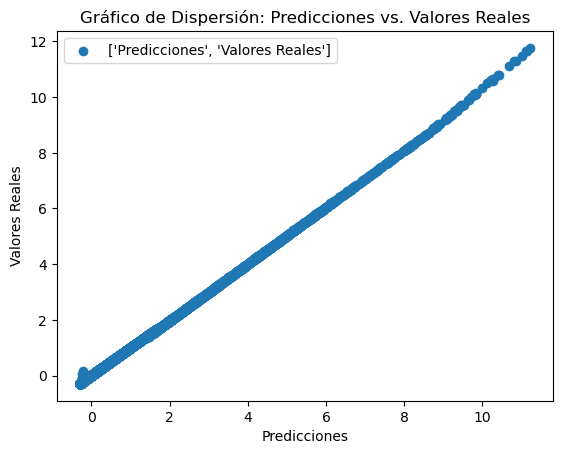

In [97]:
import matplotlib.pyplot as plt


plt.scatter(train_results['Train Predictions'], train_results['Actuals'], cmap =['blue', 'orange'], label=['Predicciones', 'Valores Reales'])
plt.title('Gráfico de Dispersión: Predicciones vs. Valores Reales')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.legend()
plt.show()

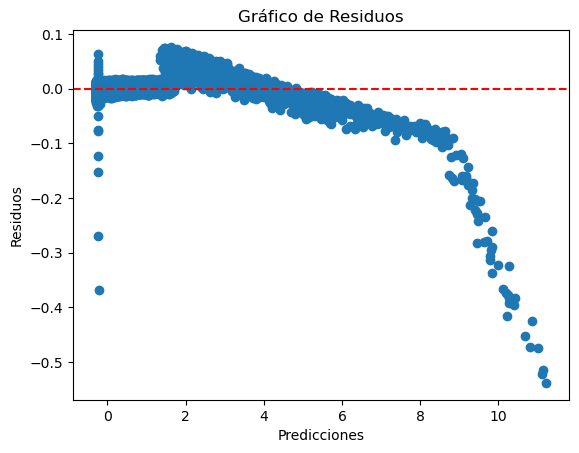

In [98]:
residuos = (train_results['Train Predictions'] - train_results['Actuals'])
plt.scatter(train_results['Train Predictions'], residuos)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='r', linestyle='--')  # Línea base en 0
plt.show()